In [1]:
# Cell 1: Imports and basic settings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

# Plot settings
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True
sns.set(style="whitegrid")

RANDOM_STATE = 42


In [2]:
# Cell 2: Load data

DATA_PATH = r"C:\Users\admin\Desktop\Dataset\Validation_Data_by_AR.csv"  # update if needed

df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())

print("\nFirst 5 rows:")
display(df.head())


Shape: (95933, 32)

Columns:
['grad_mean', 'grad_std', 'grad_median', 'grad_min', 'grad_max', 'grad_skewness', 'grad_kurtosis', 'nl_length', 'nl_num_fragments', 'nl_grad_weighted_length', 'nl_curv_mean', 'nl_curv_std', 'nl_curv_median', 'nl_curv_min', 'nl_curv_max', 'nl_bend_energy_mean', 'nl_bend_energy_std', 'nl_bend_energy_median', 'nl_bend_energy_min', 'nl_bend_energy_max', 'wavelet_energy_1', 'wavelet_energy_2', 'wavelet_energy_3', 'wavelet_energy_4', 'wavelet_energy_5', 'flux_unsigned', 'flux_signed', 'flux_negative', 'flux_positive', 'class_label', 'flare_strength', 'image_path']

First 5 rows:


,grad_mean,grad_std,grad_median,grad_min,grad_max,grad_skewness,grad_kurtosis,nl_length,nl_num_fragments,nl_grad_weighted_length,...,wavelet_energy_3,wavelet_energy_4,wavelet_energy_5,flux_unsigned,flux_signed,flux_negative,flux_positive,class_label,flare_strength,image_path
0,0.088865,0.123889,0.067672,6.970000e-15,0.062065,0.065042,0.005481,0.004564,0.007859,0.454516,...,0.077134,0.063655,0.064294,0.039729,0.955609,0.484761,0.031962,0,0,1064_hmi.M_720s.20100501_000000_TAI.1.magnetog...
1,0.088015,0.123875,0.065964,0.000000e+00,0.061718,0.064940,0.005449,0.006460,0.010478,0.454045,...,0.077012,0.063388,0.064738,0.039485,0.955798,0.484666,0.031735,0,0,1064_hmi.M_720s.20100501_001200_TAI.1.magnetog...
2,0.088024,0.124069,0.065912,2.773501e-01,0.065522,0.065113,0.005458,0.005863,0.010478,0.457687,...,0.076065,0.064053,0.064150,0.039331,0.955774,0.484451,0.031661,0,0,1064_hmi.M_720s.20100501_002400_TAI.1.magnetog...
3,0.088125,0.124757,0.065166,2.460000e-15,0.061962,0.064936,0.005430,0.007197,0.012133,0.442897,...,0.075074,0.064159,0.064113,0.039374,0.955674,0.484395,0.031734,0,0,1064_hmi.M_720s.20100501_003600_TAI.1.magnetog...
4,0.088481,0.125191,0.065047,4.690000e-15,0.059259,0.063794,0.005219,0.002703,0.003033,0.444012,...,0.075782,0.063614,0.065080,0.039516,0.955530,0.484414,0.031883,0,0,1064_hmi.M_720s.20100501_004800_TAI.1.magnetog...


In [3]:
# Cell 3: Basic info and missing values

print("Data types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())

print("\nBasic statistics for numeric columns:")
display(df.describe().T)


Data types:
grad_mean                  float64
grad_std                   float64
grad_median                float64
grad_min                   float64
grad_max                   float64
grad_skewness              float64
grad_kurtosis              float64
nl_length                  float64
nl_num_fragments           float64
nl_grad_weighted_length    float64
nl_curv_mean               float64
nl_curv_std                float64
nl_curv_median             float64
nl_curv_min                float64
nl_curv_max                  int64
nl_bend_energy_mean        float64
nl_bend_energy_std         float64
nl_bend_energy_median      float64
nl_bend_energy_min           int64
nl_bend_energy_max         float64
wavelet_energy_1           float64
wavelet_energy_2           float64
wavelet_energy_3           float64
wavelet_energy_4           float64
wavelet_energy_5           float64
flux_unsigned              float64
flux_signed                float64
flux_negative              float64
flux_pos

,count,mean,std,min,25%,50%,75%,max
grad_mean,95933.0,0.174899,0.075131,0.012891,1.203203e-01,1.638163e-01,2.151723e-01,0.544094
grad_std,95933.0,0.217303,0.076881,0.005699,1.615020e-01,2.118147e-01,2.644693e-01,0.631909
grad_median,95933.0,0.081701,0.019326,0.000000,7.026936e-02,8.165866e-02,9.310570e-02,0.348695
grad_min,95933.0,0.034761,0.091871,0.000000,4.350000e-16,1.380000e-15,3.080000e-15,0.392232
grad_max,95933.0,0.079808,0.057634,0.001759,5.603287e-02,6.698668e-02,8.137809e-02,0.709319
grad_skewness,95933.0,0.046534,0.041291,0.013147,2.994075e-02,3.920233e-02,4.922083e-02,0.683737
grad_kurtosis,95933.0,0.005114,0.018525,0.000462,1.535546e-03,2.314660e-03,3.383618e-03,0.618010
nl_length,95933.0,0.005678,0.008308,0.000000,2.492627e-03,4.037354e-03,6.284230e-03,0.267975
nl_num_fragments,95933.0,0.008249,0.018017,0.000000,2.895354e-03,4.687715e-03,7.445195e-03,0.521439
nl_grad_weighted_length,95933.0,0.369923,0.066021,0.134048,3.254719e-01,3.722192e-01,4.138136e-01,0.703835


In [4]:
# Cell 4: Separate features and labels

all_cols = df.columns.tolist()

# Known non-feature columns
non_feature_cols = ["class_label", "flare_strength", "image_path"]

feature_cols = [c for c in all_cols if c not in non_feature_cols]

print("Number of feature columns:", len(feature_cols))
print("Feature columns:")
print(feature_cols)

print("\nNon-feature columns:")
print(non_feature_cols)


Number of feature columns: 29
Feature columns:
['grad_mean', 'grad_std', 'grad_median', 'grad_min', 'grad_max', 'grad_skewness', 'grad_kurtosis', 'nl_length', 'nl_num_fragments', 'nl_grad_weighted_length', 'nl_curv_mean', 'nl_curv_std', 'nl_curv_median', 'nl_curv_min', 'nl_curv_max', 'nl_bend_energy_mean', 'nl_bend_energy_std', 'nl_bend_energy_median', 'nl_bend_energy_min', 'nl_bend_energy_max', 'wavelet_energy_1', 'wavelet_energy_2', 'wavelet_energy_3', 'wavelet_energy_4', 'wavelet_energy_5', 'flux_unsigned', 'flux_signed', 'flux_negative', 'flux_positive']

Non-feature columns:
['class_label', 'flare_strength', 'image_path']


In [5]:
# Cell 5: Existing label distributions

print("class_label value counts:")
print(df["class_label"].value_counts())

print("\nflare_strength (top 20):")
print(df["flare_strength"].value_counts().head(20))


class_label value counts:
class_label
0    76142
1    19791
Name: count, dtype: int64

flare_strength (top 20):
flare_strength
0       76142
C1.2      980
C2.2      876
C1.4      870
C1.3      865
C2.1      767
C1.0      744
C1.8      738
C1.1      592
C1.7      553
C1.6      548
C2.4      542
C2.0      508
C6.3      433
C3.3      417
C1.9      414
C2.5      379
M9.3      356
C3.0      337
C4.0      332
Name: count, dtype: int64


In [6]:
# Cell 6: Map flare_strength to 4 coarse classes: "0", "C", "M", "X"

def map_flare_class(fs):
    """
    Map detailed flare_strength to one of:
    "0" (no flare), "C", "M", "X".
    """
    # Handle numeric 0 or string "0"
    if fs == 0 or str(fs) == "0":
        return "0"
    
    s = str(fs)
    if s.startswith("C"):
        return "C"
    if s.startswith("M"):
        return "M"
    if s.startswith("X"):
        return "X"
    
    # Fallback category if something unexpected appears
    return "other"

df["flare_class4"] = df["flare_strength"].apply(map_flare_class)

print("flare_class4 value counts:")
print(df["flare_class4"].value_counts())


flare_class4 value counts:
flare_class4
0    76142
C    16975
M     2578
X      238
Name: count, dtype: int64


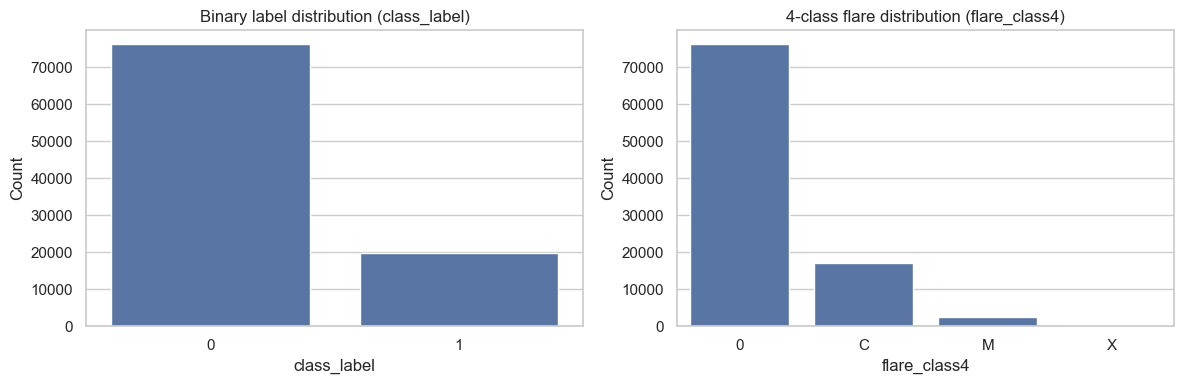

In [7]:
# Cell 7: Plot distributions of labels (binary and 4-class)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Binary class_label
sns.countplot(
    x="class_label",
    data=df,
    ax=axes[0]
)
axes[0].set_title("Binary label distribution (class_label)")
axes[0].set_xlabel("class_label")
axes[0].set_ylabel("Count")

# 4-class flare_class4
sns.countplot(
    x="flare_class4",
    data=df,
    order=["0", "C", "M", "X"],
    ax=axes[1]
)
axes[1].set_title("4-class flare distribution (flare_class4)")
axes[1].set_xlabel("flare_class4")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [8]:
# Optional: print class ratios

def print_class_ratios(series, name=""):
    counts = series.value_counts()
    total = len(series)
    print(f"\n{name} ratios:")
    for c, v in counts.items():
        print(f"  {c}: {v} ({v / total:.3%})")

print_class_ratios(df["class_label"], "class_label")
print_class_ratios(df["flare_class4"], "flare_class4")



class_label ratios:
  0: 76142 (79.370%)
  1: 19791 (20.630%)

flare_class4 ratios:
  0: 76142 (79.370%)
  C: 16975 (17.695%)
  M: 2578 (2.687%)
  X: 238 (0.248%)


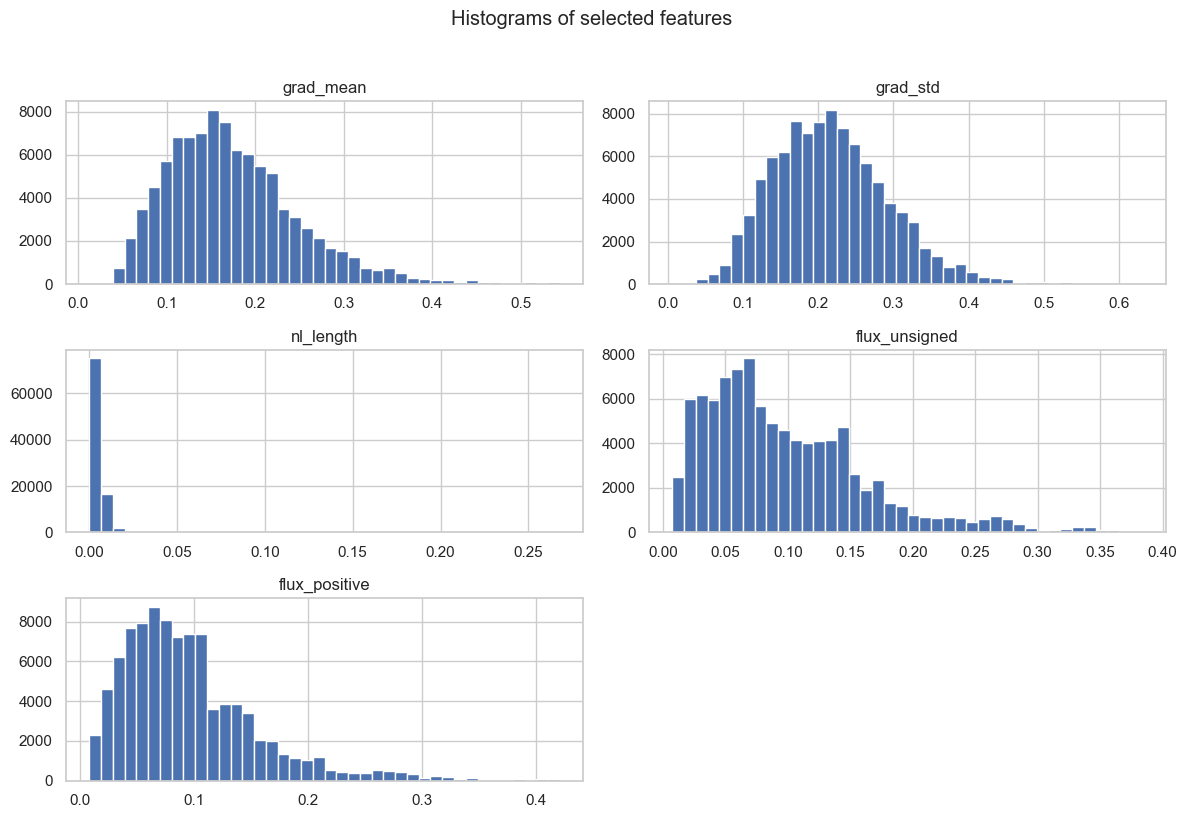

In [9]:
# Cell 8: Quick look at feature distributions (sample)

# Pick a small subset of features to plot
sample_features = [
    "grad_mean",
    "grad_std",
    "nl_length",
    "flux_unsigned",
    "flux_positive"
]

df[sample_features].hist(bins=40, figsize=(12, 8))
plt.suptitle("Histograms of selected features", y=1.02)
plt.tight_layout()
plt.show()


# FEATURE SELECTION

## Block A – Filter Methods

In [10]:
from sklearn.feature_selection import VarianceThreshold

# Low-variance filter
var_thresh = VarianceThreshold(threshold=0.0)
var_thresh.fit(df[feature_cols])

low_var_features = [
    feature_cols[i]
    for i, keep in enumerate(var_thresh.get_support())
    if not keep
]

print("Low-variance features:", low_var_features)

# Drop them
df_filtered = df.drop(columns=low_var_features)

# Update feature list
feature_cols_filtered = [c for c in feature_cols if c not in low_var_features]

# Correlation filter
corr = df_filtered[feature_cols_filtered].corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.95)]

print("\nHighly correlated features:", high_corr_features)

df_filtered = df_filtered.drop(columns=high_corr_features)
feature_cols_filtered = [c for c in feature_cols_filtered if c not in high_corr_features]

print("\nRemaining feature count:", len(feature_cols_filtered))


Low-variance features: ['nl_curv_max', 'nl_bend_energy_min']

Highly correlated features: ['nl_num_fragments', 'wavelet_energy_1', 'wavelet_energy_2', 'wavelet_energy_3', 'wavelet_energy_4', 'wavelet_energy_5', 'flux_positive']

Remaining feature count: 20


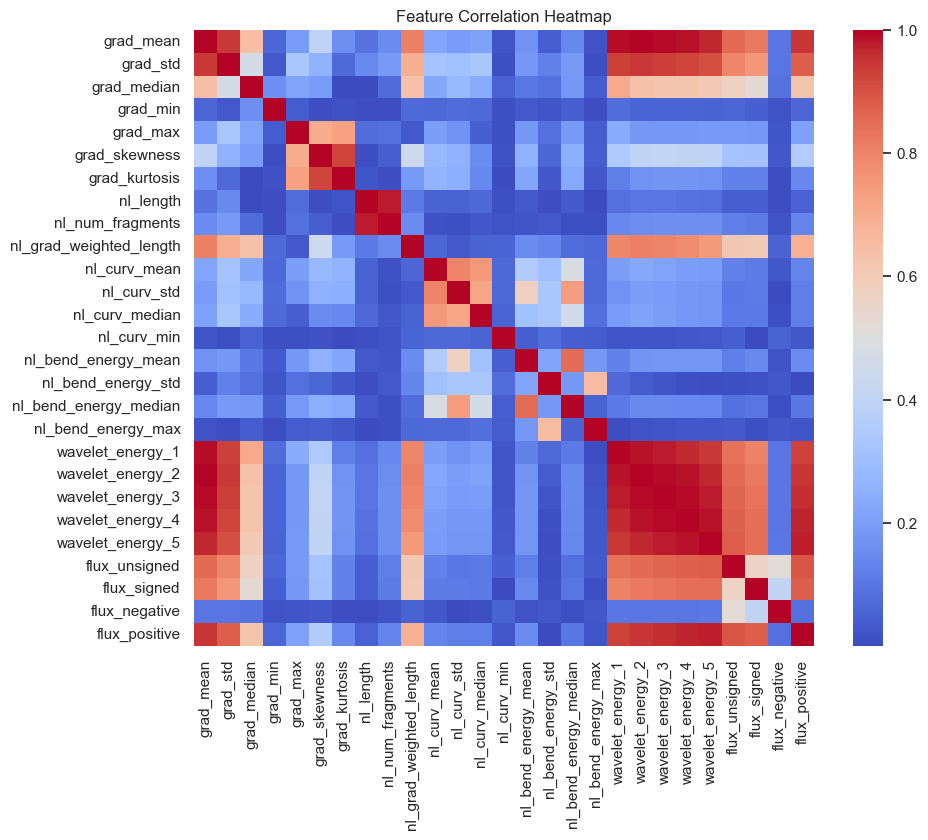

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


## Block B – Supervised Feature Ranking


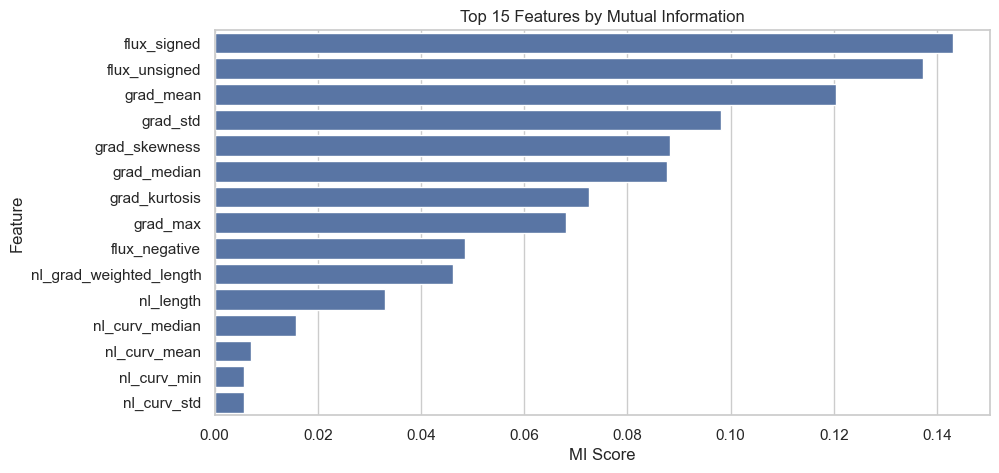

Top features by MI: ['flux_signed', 'flux_unsigned', 'grad_mean', 'grad_std', 'grad_skewness', 'grad_median', 'grad_kurtosis', 'grad_max', 'flux_negative', 'nl_grad_weighted_length', 'nl_length', 'nl_curv_median', 'nl_curv_mean', 'nl_curv_min', 'nl_curv_std', 'nl_bend_energy_max', 'grad_min', 'nl_bend_energy_std', 'nl_bend_energy_mean', 'nl_bend_energy_median']


In [12]:
from sklearn.feature_selection import mutual_info_classif

X = df_filtered[feature_cols_filtered]
y = df_filtered["flare_class4"]

# Encode labels numerically
y_enc = y.map({"0": 0, "C": 1, "M": 2, "X": 3})

mi_scores = mutual_info_classif(X, y_enc, random_state=RANDOM_STATE)
mi_series = pd.Series(mi_scores, index=feature_cols_filtered).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=mi_series[:15], y=mi_series.index[:15])
plt.title("Top 15 Features by Mutual Information")
plt.xlabel("MI Score")
plt.ylabel("Feature")
plt.show()

# Keep top-k (example: 20)
top_k = 20
selected_features_mi = mi_series.head(top_k).index.tolist()

print("Top features by MI:", selected_features_mi)


## Embedded Feature Selection

c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


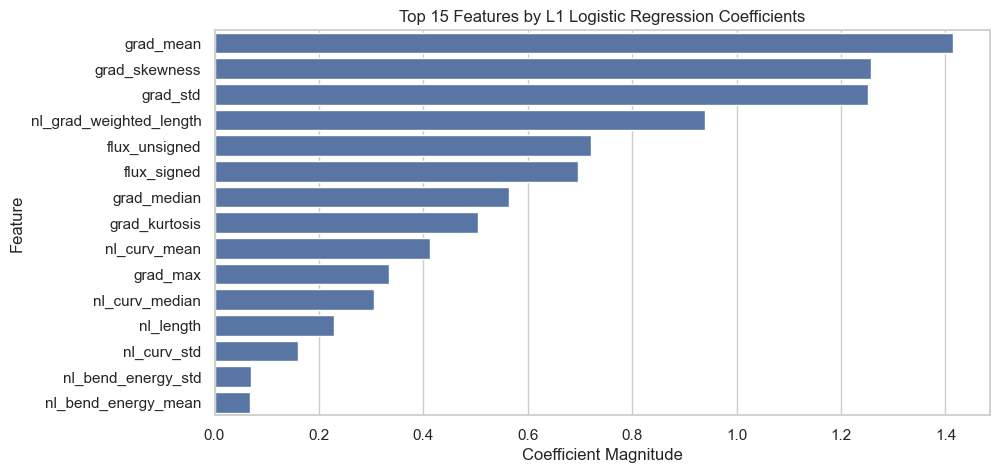

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

l1_model = LogisticRegression(
    penalty="l1", solver="liblinear", C=0.1, random_state=RANDOM_STATE
)
l1_model.fit(X_scaled, y_enc)

coef = np.abs(l1_model.coef_).mean(axis=0)
coef_series = pd.Series(coef, index=feature_cols_filtered).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=coef_series[:15], y=coef_series.index[:15])
plt.title("Top 15 Features by L1 Logistic Regression Coefficients")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()

selected_features_l1 = coef_series.head(top_k).index.tolist()


In [14]:
final_features_union = sorted(set(selected_features_mi) | set(selected_features_l1))
final_features_intersection = sorted(set(selected_features_mi) & set(selected_features_l1))

print("Union count:", len(final_features_union))
print("Intersection count:", len(final_features_intersection))

print("\nUnion:", final_features_union)
print("\nIntersection:", final_features_intersection)


Union count: 20
Intersection count: 20

Union: ['flux_negative', 'flux_signed', 'flux_unsigned', 'grad_kurtosis', 'grad_max', 'grad_mean', 'grad_median', 'grad_min', 'grad_skewness', 'grad_std', 'nl_bend_energy_max', 'nl_bend_energy_mean', 'nl_bend_energy_median', 'nl_bend_energy_std', 'nl_curv_mean', 'nl_curv_median', 'nl_curv_min', 'nl_curv_std', 'nl_grad_weighted_length', 'nl_length']

Intersection: ['flux_negative', 'flux_signed', 'flux_unsigned', 'grad_kurtosis', 'grad_max', 'grad_mean', 'grad_median', 'grad_min', 'grad_skewness', 'grad_std', 'nl_bend_energy_max', 'nl_bend_energy_mean', 'nl_bend_energy_median', 'nl_bend_energy_std', 'nl_curv_mean', 'nl_curv_median', 'nl_curv_min', 'nl_curv_std', 'nl_grad_weighted_length', 'nl_length']


## PCA

(95933, 20)
(95933, 20)


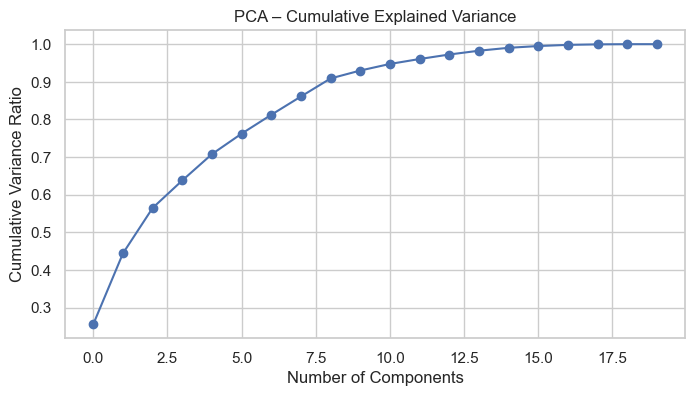

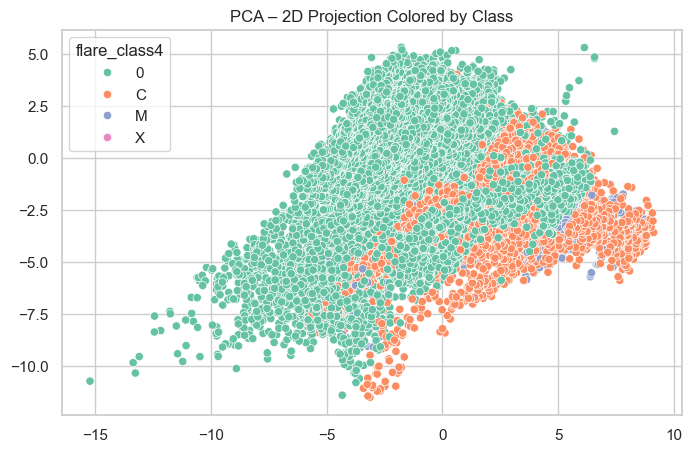

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Choose your feature set
X = df_filtered[final_features_union]
y = df_filtered["flare_class4"].map({"0":0, "C":1, "M":2, "X":3})

print(X.shape)
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)
# PCA model
pca = PCA(n_components=len(X.columns))
X_pca = pca.fit_transform(X_scaled)

# Explained variance plot
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("PCA – Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Ratio")
plt.grid(True)
plt.show()

# 2D visualization
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)
sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=df_filtered["flare_class4"], palette="Set2")
plt.title("PCA – 2D Projection Colored by Class")
plt.show()


## t-SNE and UMAP (structure visualization)

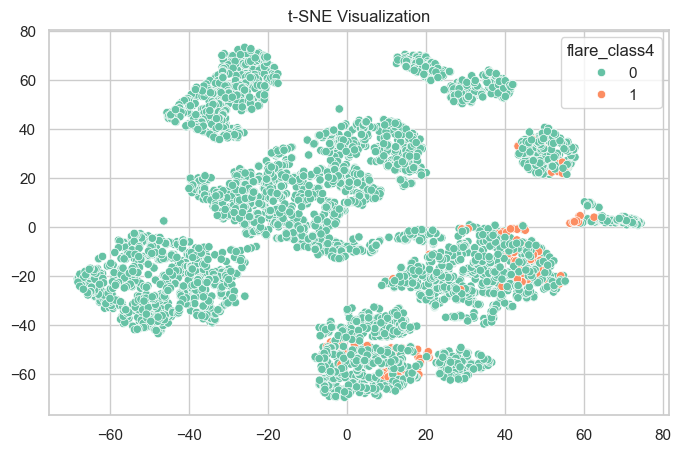

c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


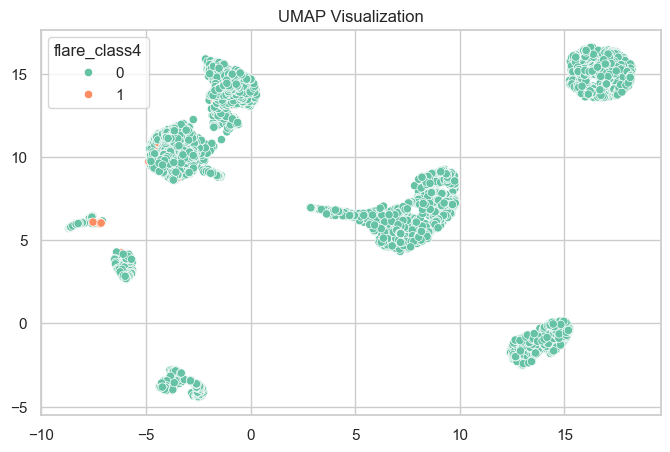

In [16]:
from sklearn.manifold import TSNE
from umap import umap_ as umap # <-- key change

# t-SNE on a sample (for speed)
sample_size = 5000
X_sample = X_scaled[:sample_size]
y_sample = y[:sample_size]

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_sample)

sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_sample, palette="Set2")
plt.title("t-SNE Visualization")
plt.show()

# UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_sample)

sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y_sample, palette="Set2")
plt.title("UMAP Visualization")
plt.show()


## L1 LOGISTIC REGRESSION

c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.85      0.98      0.91     22827
           1       0.59      0.28      0.38      5131
           2       1.00      0.00      0.00       749
           3       0.00      0.00      0.00        73

    accuracy                           0.83     28780
   macro avg       0.61      0.32      0.32     28780
weighted avg       0.80      0.83      0.79     28780



c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

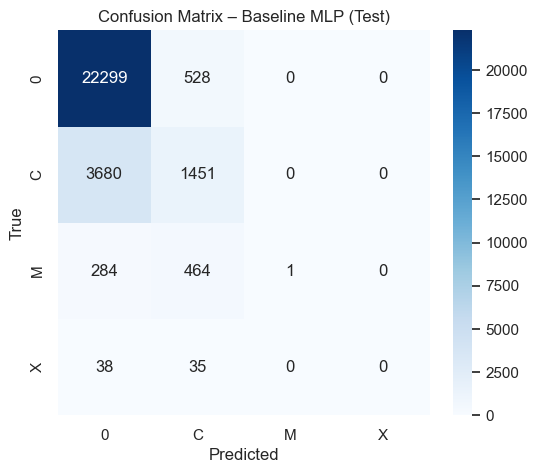

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_l1, X_test_l1, y_train_l1, y_test_l1 = train_test_split(X, y_enc, test_size=0.3, random_state=1)
l1_model = LogisticRegression(
    penalty="l1", solver="liblinear", C=0.1, random_state=RANDOM_STATE
)
l1_model.fit(X_train_l1, y_train_l1)
y_pred_l1 = l1_model.predict(X_test_l1)
target_names = ["0", "C", "M", "X"]
print(classification_report(y_test_l1, y_pred_l1))

cm = confusion_matrix(y_test_l1, y_pred_l1)
cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Baseline MLP (Test)")
plt.show()


## Models

In [18]:
# Cell 4.1.1: Imports for deep models and metrics

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, TensorDataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix
)


In [19]:
# Cell 4.1.2: Feature matrix and encoded labels

# choose the feature set you want to start with
used_features = final_features_union  # or final_features_intersection

X = df_filtered[used_features].values
y = df_filtered["flare_class4"].map({"0": 0, "C": 1, "M": 2, "X": 3}).values

print("X shape:", X.shape)
print("Label value counts:", pd.Series(y).value_counts())


X shape: (95933, 20)
Label value counts: 0    76142
1    16975
2     2578
3      238
Name: count, dtype: int64


In [20]:
# Cell 4.1.3: Train / val / test split (stratified)

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=RANDOM_STATE,
    stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full,
    y_train_full,
    test_size=0.1765,   # 0.1765 * 0.85 ≈ 0.15 -> total 70/15/15
    random_state=RANDOM_STATE,
    stratify=y_train_full
)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)


Train: (67150, 20) Val: (14393, 20) Test: (14390, 20)


In [21]:
# Cell 4.1.4: Standard scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


In [22]:
# Cell 4.1.5: Tensor datasets and dataloaders

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32)
X_val_t   = torch.tensor(X_val_scaled, dtype=torch.float32)
X_test_t  = torch.tensor(X_test_scaled, dtype=torch.float32)

y_train_t = torch.tensor(y_train, dtype=torch.long)
y_val_t   = torch.tensor(y_val, dtype=torch.long)
y_test_t  = torch.tensor(y_test, dtype=torch.long)

train_ds = TensorDataset(X_train_t, y_train_t)
val_ds   = TensorDataset(X_val_t, y_val_t)
test_ds  = TensorDataset(X_test_t, y_test_t)

batch_size = 256

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

xb, yb = next(iter(train_loader))
print("batch:", xb.shape)


Using device: cpu
batch: torch.Size([256, 20])


In [23]:
# Cell 4.2.1: Baseline MLP model

class BaselineMLP(nn.Module):
    def __init__(self, input_dim, hidden_dims=(64, 32), num_classes=4):
        super().__init__()
        layers = []
        prev = input_dim
        for h in hidden_dims:
            layers.append(nn.Linear(prev, h))
            layers.append(nn.ReLU())
            prev = h
        layers.append(nn.Linear(prev, num_classes))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

input_dim = X_train_scaled.shape[1]
num_classes = 4

model = BaselineMLP(input_dim=input_dim, hidden_dims=(64, 32), num_classes=num_classes).to(device)
model


BaselineMLP(
  (net): Sequential(
    (0): Linear(in_features=20, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=4, bias=True)
  )
)

In [24]:
# Cell 4.2.2: Class weights (handle imbalance)

class_counts = pd.Series(y_train).value_counts().sort_index()
print("Train class counts:", class_counts.to_dict())

# inverse frequency
class_weights = 1.0 / class_counts
class_weights = class_weights / class_weights.mean()  # normalize

print("Class weights:", class_weights.to_dict())

class_weights_t = torch.tensor(class_weights.values, dtype=torch.float32).to(device)


Train class counts: {0: 53297, 1: 11882, 2: 1804, 3: 167}
Class weights: {0: 0.011293914777365266, 1: 0.05065912943016635, 2: 0.3336650642401533, 3: 3.6043818915523147}


In [25]:
# Cell 4.2.3: Training and evaluation helper functions

def run_epoch(model, loader, optimizer, criterion, train=True):
    if train:
        model.train()
    else:
        model.eval()

    all_preds = []
    all_targets = []
    running_loss = 0.0

    for xb, yb in loader:
        xb = xb.to(device)
        yb = yb.to(device)

        if train:
            optimizer.zero_grad()

        logits = model(xb)
        loss = criterion(logits, yb)

        if train:
            loss.backward()
            optimizer.step()

        running_loss += loss.item() * xb.size(0)

        preds = torch.argmax(logits, dim=1)
        all_preds.append(preds.detach().cpu().numpy())
        all_targets.append(yb.detach().cpu().numpy())

    all_preds = np.concatenate(all_preds)
    all_targets = np.concatenate(all_targets)

    avg_loss = running_loss / len(loader.dataset)
    acc = accuracy_score(all_targets, all_preds)
    macro_f1 = f1_score(all_targets, all_preds, average="macro")

    return avg_loss, acc, macro_f1, all_targets, all_preds


In [26]:
import torch
print(torch.__version__)
print("CUDA:", torch.version.cuda)
print("Available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")


2.9.0+cpu
CUDA: None
Available: False
Device name: None


In [27]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# make sure RANDOM_STATE and device are defined earlier
torch.manual_seed(RANDOM_STATE)

input_dim = X_train.shape[1]
num_classes = 4

def train_baseline_config(hidden_dims, lr, weight_decay,
                          max_epochs=40, patience=5, min_delta=0.0):
    """Train a BaselineMLP with early stopping, return model, history, best val F1."""
    model = BaselineMLP(
        input_dim=input_dim,
        hidden_dims=hidden_dims,
        num_classes=num_classes
    ).to(device)

    criterion = nn.CrossEntropyLoss(weight=class_weights_t)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    history = {
        "train_loss": [],
        "val_loss": [],
        "train_macro_f1": [],
        "val_macro_f1": [],
    }

    best_val_f1 = -np.inf
    best_state = None
    patience_counter = 0

    for epoch in range(1, max_epochs + 1):
        train_loss, train_acc, train_f1, _, _ = run_epoch(
            model, train_loader, optimizer, criterion, train=True
        )
        val_loss, val_acc, val_f1, _, _ = run_epoch(
            model, val_loader, optimizer, criterion, train=False
        )

        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["train_macro_f1"].append(train_f1)
        history["val_macro_f1"].append(val_f1)

        # early stopping on val F1
        if val_f1 > best_val_f1 + min_delta:
            best_val_f1 = val_f1
            best_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"  Early stopping at epoch {epoch:02d}")
                break

        print(
            f"  Epoch {epoch:02d} | "
            f"Train loss {train_loss:.4f}, F1 {train_f1:.4f} | "
            f"Val loss {val_loss:.4f}, F1 {val_f1:.4f}"
        )

    if best_state is not None:
        model.load_state_dict(best_state)

    return model, history, best_val_f1

def count_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


## BASELINE  (ABLATION 1 - MODEL COMPLEXITY)

In [28]:
# configs for complexity sweep
arch_configs_complexity = [
    {"name": "h256_128_64", "hidden_dims": (256, 128, 64)},
]

fixed_lr = 0.003
fixed_wd = 0

results_complexity = []

for cfg in arch_configs_complexity:
    print(f"\n=== Complexity ablation: {cfg['name']} | hidden={cfg['hidden_dims']} ===")
    model_cfg, hist_cfg, best_val_f1_cfg = train_baseline_config(
        hidden_dims=cfg["hidden_dims"],
        lr=fixed_lr,
        weight_decay=fixed_wd,
        max_epochs=20,
        patience=5,
        min_delta=0.0,
    )
    results_complexity.append({
        "name": cfg["name"],
        "hidden_dims": cfg["hidden_dims"],
        "history": hist_cfg,
        "best_val_f1": best_val_f1_cfg,
        "model": model_cfg,
        "num_params": count_params(model_cfg),
    })



=== Complexity ablation: h256_128_64 | hidden=(256, 128, 64) ===
  Epoch 01 | Train loss 0.8226, F1 0.3816 | Val loss 0.5920, F1 0.4500
  Epoch 02 | Train loss 0.5479, F1 0.4773 | Val loss 0.5520, F1 0.5097
  Epoch 03 | Train loss 0.4459, F1 0.5428 | Val loss 0.3871, F1 0.5588
  Epoch 04 | Train loss 0.3582, F1 0.6174 | Val loss 0.3808, F1 0.5874
  Epoch 05 | Train loss 0.3360, F1 0.6460 | Val loss 0.2998, F1 0.7106
  Epoch 06 | Train loss 0.3000, F1 0.6466 | Val loss 0.4255, F1 0.6024
  Epoch 07 | Train loss 0.2817, F1 0.6665 | Val loss 0.2654, F1 0.6881
  Epoch 08 | Train loss 0.2160, F1 0.7537 | Val loss 0.2163, F1 0.7761
  Epoch 09 | Train loss 0.2063, F1 0.7679 | Val loss 0.2284, F1 0.7874
  Epoch 10 | Train loss 0.2039, F1 0.7605 | Val loss 0.1969, F1 0.7917
  Epoch 11 | Train loss 0.1957, F1 0.7667 | Val loss 0.2697, F1 0.7875
  Epoch 12 | Train loss 0.1751, F1 0.7935 | Val loss 0.2152, F1 0.7507
  Epoch 13 | Train loss 0.1684, F1 0.8067 | Val loss 0.1915, F1 0.8052
  Epoch 14 


=== Training XGBoost model ===

=== Training XGBoost model ===


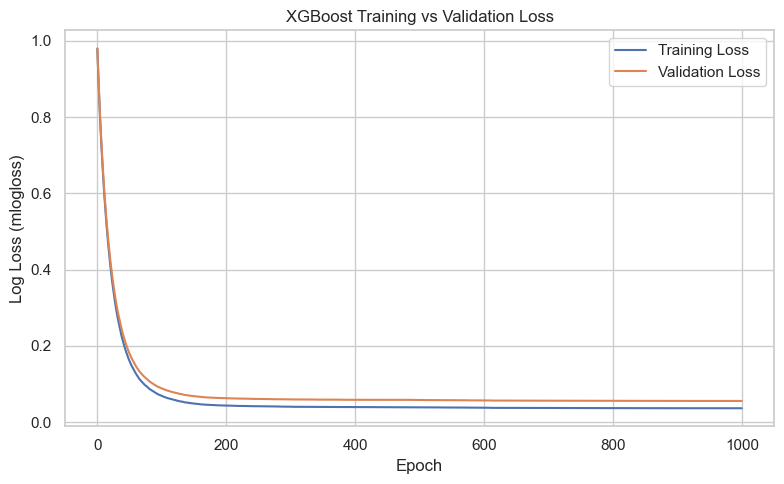


=== XGBoost (Validation set) performance ===
Accuracy: 0.984228444382686
Balanced accuracy: 0.9419736338600962
Macro F1: 0.9519138226949292

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11424
           C       0.97      0.95      0.96      2547
           M       0.98      0.94      0.96       387
           X       0.91      0.89      0.90        35

    accuracy                           0.98     14393
   macro avg       0.96      0.94      0.95     14393
weighted avg       0.98      0.98      0.98     14393



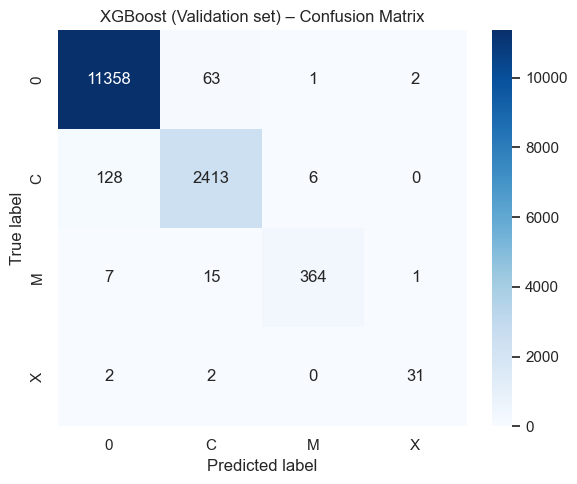


=== XGBoost (Test set) performance ===
Accuracy: 0.9858234885337039
Balanced accuracy: 0.9562761985313406
Macro F1: 0.966124180799723

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11421
           C       0.98      0.95      0.96      2546
           M       0.97      0.97      0.97       387
           X       0.97      0.92      0.94        36

    accuracy                           0.99     14390
   macro avg       0.98      0.96      0.97     14390
weighted avg       0.99      0.99      0.99     14390



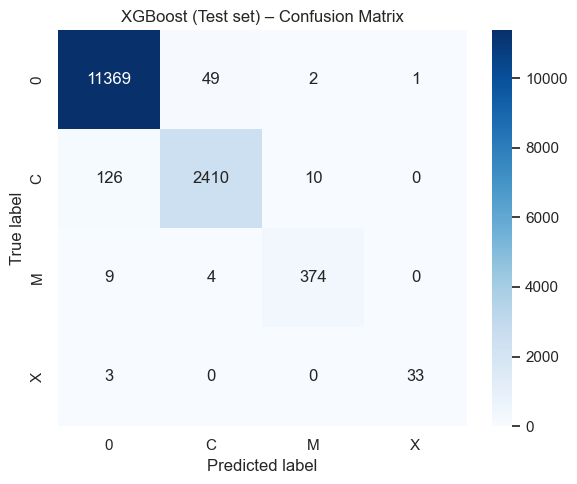

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from collections import Counter
import numpy as np
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
# Pipeline: impute -> scale -> XGBoost
class_names = ["0", "C", "M", "X"]
xgb_model = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("clf", XGBClassifier(
        objective="multi:softprob",      # <-- change here
        num_class=len(class_names),
        eval_metric="mlogloss",
        learning_rate=0.05,
        n_estimators=1000,
        max_depth=6,
        subsample=0.5,
        colsample_bytree=0.8,
        gamma=1,
        reg_lambda=1.0,
        random_state=RANDOM_STATE,
        n_jobs=-1
    ))
])

print("\n=== Training XGBoost model ===")
xgb_model.fit(X_train, y_train)


print("\n=== Training XGBoost model ===")

xgb_model.fit(X_train, y_train)


imputer = xgb_model.named_steps["imputer"]
scaler = xgb_model.named_steps["scaler"]

X_train_proc = scaler.transform(imputer.transform(X_train))
X_val_proc   = scaler.transform(imputer.transform(X_val))

xgb_for_plot = XGBClassifier(
    objective="multi:softprob",  # <-- also here
    num_class=len(class_names),
    eval_metric="mlogloss",
    learning_rate=0.05,
    n_estimators=1000,
    max_depth=10,
    subsample=0.5,
    colsample_bytree=0.8,
    gamma=1,
    reg_lambda=1.0,
    random_state=RANDOM_STATE,
    n_jobs=-1
)


xgb_for_plot.fit(
    X_train_proc, y_train,
    eval_set=[(X_train_proc, y_train), (X_val_proc, y_val)],
    verbose=False
)


results = xgb_for_plot.evals_result()

train_loss = results["validation_0"]["mlogloss"]
val_loss   = results["validation_1"]["mlogloss"]

plt.figure(figsize=(8, 5))
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Log Loss (mlogloss)")
plt.title("XGBoost Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


def eval_model(name, model, X_split, y_split):
    y_pred = model.predict(X_split)
    acc = accuracy_score(y_split, y_pred)
    bal_acc = balanced_accuracy_score(y_split, y_pred)
    macro_f1 = f1_score(y_split, y_pred, average="macro", zero_division=0)

    print(f"\n=== {name} performance ===")
    print("Accuracy:", acc)
    print("Balanced accuracy:", bal_acc)
    print("Macro F1:", macro_f1)
    print("\nClassification Report:")
    print(
        classification_report(
            y_split,
            y_pred,
            labels=range(len(class_names)),   # force 0,1,2,3
            target_names=class_names,
            zero_division=0
        )
    )

  
    cm = confusion_matrix(
        y_split,
        y_pred,
        labels=range(len(class_names))
    )

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title(f"{name} – Confusion Matrix")
    plt.tight_layout()
    plt.show()


eval_model("XGBoost (Validation set)", xgb_model, X_val, y_val)
eval_model("XGBoost (Test set)", xgb_model,X_test,y_test)

In [30]:
import numpy as np
import torch

class NeuralXGBEnsemble:
    def __init__(self, nn_model, xgb_model, scaler, device,
                 w_nn=0.7, w_xgb=0.3, batch_size=256):
        """
        nn_model: trained PyTorch model (BaselineMLP)
        xgb_model: trained Pipeline with XGBClassifier (objective='multi:softprob')
        scaler: StandardScaler used for the NN (the one you used for X_train_scaled)
        device: 'cuda' or 'cpu'
        w_nn, w_xgb: weights for soft-voting
        """
        self.nn_model = nn_model.to(device)
        self.nn_model.eval()
        self.xgb_model = xgb_model
        self.scaler = scaler
        self.device = device
        self.w_nn = w_nn
        self.w_xgb = w_xgb
        self.batch_size = batch_size

    def _nn_proba(self, X):
        """
        X: numpy array of raw features (same as used with XGB).
        Returns: numpy array (n_samples, num_classes) with probabilities.
        """
        X_scaled = self.scaler.transform(X)
        X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

        all_probs = []

        with torch.no_grad():
            for i in range(0, len(X_tensor), self.batch_size):
                xb = X_tensor[i:i + self.batch_size].to(self.device)
                logits = self.nn_model(xb)
                probs = torch.softmax(logits, dim=1)
                all_probs.append(probs.cpu().numpy())

        return np.concatenate(all_probs, axis=0)

    def _xgb_proba(self, X):
        """
        X: numpy array (unscaled), passed to the Pipeline.
        """
        return self.xgb_model.predict_proba(X)

    def predict_proba(self, X):
        """
        Soft-voting: weighted average of NN and XGB probabilities.
        """
        probs_nn = self._nn_proba(X)
        probs_xgb = self._xgb_proba(X)

        # Weighted average
        probs_ens = self.w_nn * probs_nn + self.w_xgb * probs_xgb
        return probs_ens

    def predict(self, X):
        probs_ens = self.predict_proba(X)
        return np.argmax(probs_ens, axis=1)


best_mlp = results_complexity[0]["model"]  # h256_128_64 model

ensemble_model = NeuralXGBEnsemble(
    nn_model=best_mlp,
    xgb_model=xgb_model,
    scaler=scaler,          # the deep-net StandardScaler
    device=device,
    w_nn=0.8,
    w_xgb=0.2
)



=== Ensemble (Validation set) ===

=== Ensemble (Validation set) performance ===
Accuracy: 0.9353157785034392
Balanced accuracy: 0.9508573007640068
Macro F1: 0.8409403198019324

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     11424
           C       0.79      0.89      0.84      2547
           M       0.74      0.97      0.84       387
           X       0.56      1.00      0.72        35

    accuracy                           0.94     14393
   macro avg       0.77      0.95      0.84     14393
weighted avg       0.94      0.94      0.94     14393



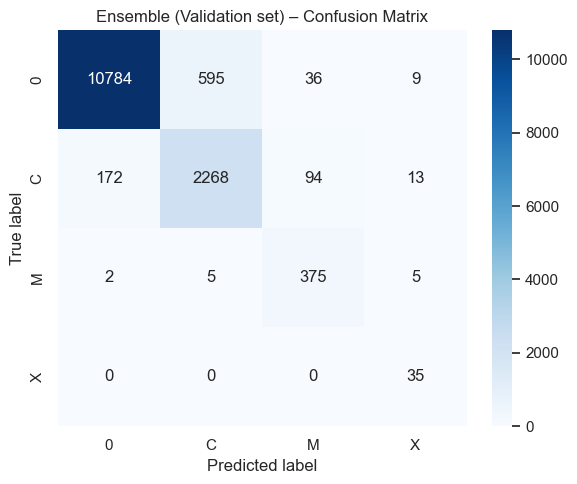


=== Ensemble (Test set) ===

=== Ensemble (Test set) performance ===
Accuracy: 0.9364836692147325
Balanced accuracy: 0.9483012530745855
Macro F1: 0.8334605414560319

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     11421
           C       0.80      0.90      0.84      2546
           M       0.72      0.98      0.83       387
           X       0.54      0.97      0.69        36

    accuracy                           0.94     14390
   macro avg       0.76      0.95      0.83     14390
weighted avg       0.94      0.94      0.94     14390



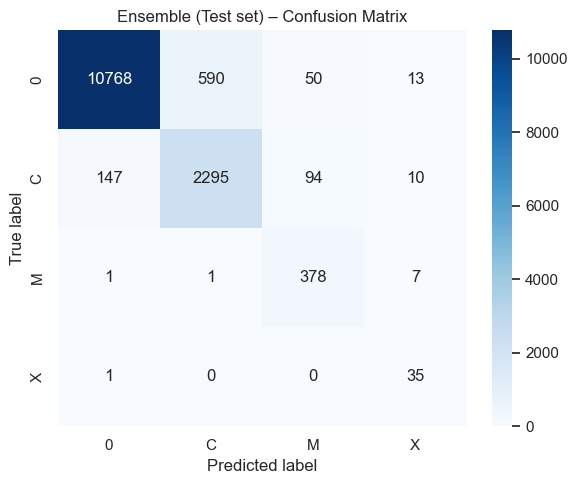

In [31]:
print("\n=== Ensemble (Validation set) ===")
eval_model("Ensemble (Validation set)", ensemble_model, X_val, y_val)

print("\n=== Ensemble (Test set) ===")
eval_model("Ensemble (Test set)", ensemble_model, X_test, y_test)
